In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

nx.__version__

'2.8.4'

# this code is used to generate graphs\

# Grid 
### train test

In [ ]:
def build_grid(grid_start,grid_end):
    adjs = []
    n_nodes = []
    for i in range(grid_start, grid_end):
        for j in range(grid_start, grid_end):
            G = nx.grid_2d_graph(i, j)
            adj = nx.adjacency_matrix(G).toarray()
            adjs.append(adj)
            n_nodes.append(len(G.nodes()))
    n_max = (grid_end - 1) * (grid_end - 1)
    #print(len(adjs),n_max,np.max(n_nodes),np.min(n_nodes))
    return np.array(adjs, dtype=object)

In [ ]:

grid_start = 10
grid_end = 20
adjs = build_grid(grid_start,grid_end)
random.seed(42)
graphs_len = len(adjs)
idxs = list(range(graphs_len))
random.shuffle(idxs)
test_idxs = idxs[int(0.8 * graphs_len):]
val_idxs = idxs[0:int(0.2*graphs_len)]
train_idxs = idxs[int(0.2*graphs_len):int(0.8*graphs_len)]

test = adjs[test_idxs]
train = adjs[train_idxs]
val = adjs[val_idxs]

np.save("dataset/grid/grid_train_val_test.npy",np.array([train,val,test], dtype=object))

## Grid large

In [2]:
def build_grid(grid_start,grid_end,ink):
    adjs = []
    n_nodes = []
    for i in range(grid_start, grid_end,ink):
        for j in range(grid_start, grid_end,ink):
            G = nx.grid_2d_graph(i, j)
            adj = nx.adjacency_matrix(G).toarray()
            adjs.append(adj)
            n_nodes.append(len(G.nodes()))
    n_max = (grid_end - 1) * (grid_end - 1)
    #print(len(adjs),n_max,np.max(n_nodes),np.min(n_nodes))
    adjs = np.array(adjs, dtype=object)
    np.random.shuffle(adjs)
    return adjs

In [3]:
grid_start = 10
grid_end = 20
m = 15
for increm in [1.1,1.25,1.5,2.0,4.0]:#,8.0]:

    new_m = int(m*increm)
    nodes_min = new_m-5
    nodes_max = new_m+5
    print("grid start",nodes_min,"grid end",nodes_max)
    

    adjs = build_grid(nodes_min,nodes_max,1)
    adjs = adjs[0:100]
    print(len(adjs))
    np.save("dataset/grid/grid_large_"+str(increm)+".npy",adjs)

grid start 55 grid end 65


/tmp/ipykernel_192584/1680752995.py:7: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(G).toarray()
/tmp/ipykernel_192584/1680752995.py:7: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(G).toarray()


70


In [12]:
m = 15
print("grid")
for increm in [1.1,1.25,1.5,2.0,4.0]:#,8.0]:
    
    new_m = int(m*increm)
    nodes_min = new_m-5
    nodes_max = new_m+5
    print(increm,"valore da aggiungre \t",nodes_max**2-400)

grid
1.1 valore da aggiungre 	 41
1.25 valore da aggiungre 	 129
1.5 valore da aggiungre 	 329
2.0 valore da aggiungre 	 825
4.0 valore da aggiungre 	 3825


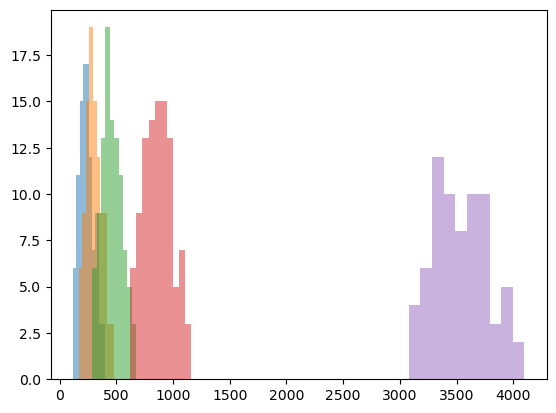

In [2]:
for increm in [1.1,1.25,1.5,2.0,4.0]:#,8.0]:
    a = np.load("dataset/grid/grid_large_/grid_large_"+str(increm)+".npy",allow_pickle=True)
    x = [len(i) for i in a]
    plt.hist(x,alpha=0.5,label=str(increm))
    
plt.show()

# Planar
## train test

In [13]:
from scipy.spatial import Delaunay
def build_planar(n_graphs,n_nodes_in):
    adjs = []
    n_nodes = []
    for i in range(n_graphs):
        # Generate planar graphs using Delauney traingulation
        points = np.random.rand(n_nodes_in,2)
        tri = Delaunay(points)
        adj = np.zeros([n_nodes_in,n_nodes_in])

        for t in tri.simplices:
            adj[t[0], t[1]] = 1
            adj[t[1], t[2]] = 1
            adj[t[2], t[0]] = 1
            adj[t[1], t[0]] = 1
            adj[t[2], t[1]] = 1
            adj[t[0], t[2]] = 1

        G = nx.from_numpy_matrix(adj)

        adjs.append(adj)
        n_nodes.append(len(G.nodes()))
    return np.array(adjs)

In [14]:
n_graphs = 200
n_nodes_in = 64

adjs = build_planar(n_graphs,n_nodes_in)

random.seed(42)
graphs_len = len(adjs)
idxs = list(range(graphs_len))
random.shuffle(idxs)
test_idxs = idxs[int(0.8 * graphs_len):]
val_idxs = idxs[0:int(0.2*graphs_len)]
train_idxs = idxs[int(0.2*graphs_len):int(0.8*graphs_len)]

test = adjs[test_idxs]
train = adjs[train_idxs]
val = adjs[val_idxs]

np.save("dataset/planar/planar_train_val_test.npy",np.array([train,val,test], dtype=object))

## planar_large

In [16]:
n_graphs = 200
orig_size = 64

for increm in [1.1,1.25,1.5,2.0,4.0,8.0]:
    n_nodes = int(orig_size*increm)
    print(orig_size,"X",increm,"=",n_nodes)
    adjs = build_planar(n_graphs,n_nodes)
    
    np.save("dataset/planar/planar_large_"+str(increm)+".npy",adjs)

64 X 1.1 = 70
64 X 1.25 = 80
64 X 1.5 = 96
64 X 2.0 = 128
64 X 4.0 = 256
64 X 8.0 = 512


In [18]:
orig_size = 64
print("planar")
for increm in [1.1,1.25,1.5,2.0,4.0,8.0]:
    print(increm,"valore da aggiungre \t",(int(increm*orig_size))-orig_size)
    

planar
1.1 valore da aggiungre 	 6
1.25 valore da aggiungre 	 16
1.5 valore da aggiungre 	 32
2.0 valore da aggiungre 	 64
4.0 valore da aggiungre 	 192
8.0 valore da aggiungre 	 448


# Ego

## Train test

In [ ]:
adjs = np.load("dataset/ego_small.npy")

random.seed(42)
graphs_len = len(adjs)
idxs = list(range(graphs_len))
random.shuffle(idxs)
test_idxs = idxs[int(0.8 * graphs_len):]
val_idxs = idxs[0:int(0.2*graphs_len)]
train_idxs = idxs[int(0.2*graphs_len):int(0.8*graphs_len)]

test = adjs[test_idxs]
train = adjs[train_idxs]
val = adjs[val_idxs]

np.save("dataset/ego/ego_train_val_test.npy",np.array([train,val,test]))

# SBM

In [19]:
def build_sbm(n_graphs,max_comm_size,min_comm_size,min_n_com,max_n_com):
    adjs = []
    for seed in range(n_graphs):
        n_comunities = np.random.randint(min_n_com, max_n_com)
        comunity_sizes = np.random.randint(min_comm_size, max_comm_size, size=n_comunities)
        probs = np.ones([n_comunities, n_comunities]) * 0.005
        probs[np.arange(n_comunities), np.arange(n_comunities)] = 0.3

        G = nx.stochastic_block_model(comunity_sizes, probs, seed=seed)
        adj = nx.adjacency_matrix(G).A
        adjs.append(adj)
    return np.array(adjs, dtype=object)

In [20]:
# splits
n_graphs =  200
max_comm_size = 40
min_comm_size = 20
min_n_com = 2
max_n_com = 5

adjs = build_sbm(n_graphs,max_comm_size,min_comm_size,min_n_com,max_n_com)

random.seed(42)
graphs_len = len(adjs)
idxs = list(range(graphs_len))
random.shuffle(idxs)
test_idxs = idxs[int(0.8 * graphs_len):]
val_idxs = idxs[0:int(0.2*graphs_len)]
train_idxs = idxs[int(0.2*graphs_len):int(0.8*graphs_len)]

test = adjs[test_idxs]
train = adjs[train_idxs]
val = adjs[val_idxs]

np.save("dataset/sbm/sbm_train_val_test.npy",np.array([train,val,test], dtype=object))

/tmp/ipykernel_192584/523042947.py:10: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(G).A


# SBM large

In [24]:
minm = 2*20
maxi = 40*4
minm,maxi

(40, 160)

In [43]:
n_graphs = 200
orig_size_max = 40
orig_size_min = 20
min_n_com = 2
max_n_com = 5

delta = 10
m = 30
for increm in [1.1,1.25,1.5,2.0,4.0,8.0]:
    
    nodes_min = int(orig_size_min*increm)
    nodes_max = int(orig_size_max*increm)
    print("MIN",nodes_min,"MAX",nodes_max,"\tnb comm:",min_n_com,"-",max_n_com)
    
    adjs = build_sbm(n_graphs,nodes_max,nodes_min,min_n_com,max_n_com)
    np.save("dataset/sbm/sbm_large_"+str(increm)+".npy",adjs)

MIN 22 MAX 44 	nb comm: 2 - 5


/tmp/ipykernel_192584/523042947.py:10: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(G).A


MIN 25 MAX 50 	nb comm: 2 - 5
MIN 30 MAX 60 	nb comm: 2 - 5
MIN 40 MAX 80 	nb comm: 2 - 5
MIN 80 MAX 160 	nb comm: 2 - 5
MIN 160 MAX 320 	nb comm: 2 - 5


In [48]:
20*20

400

In [57]:
(40, 160)

orig_size_max = 40
orig_size_min = 20
for increm in [1.1,1.25,1.5,2.0,4.0,8.0]:
    nodes_min = int(orig_size_min*increm)
    nodes_max = int(orig_size_max*increm)
    
    print(increm ,"np.random.randint(",(nodes_min*2)-40,",",(nodes_max*4)-160,")")

1.1 np.random.randint( 4 , 16 )
1.25 np.random.randint( 10 , 40 )
1.5 np.random.randint( 20 , 80 )
2.0 np.random.randint( 40 , 160 )
4.0 np.random.randint( 120 , 480 )
8.0 np.random.randint( 280 , 1120 )


In [44]:
res = []
for increm in [1.1,1.5,2.0,4.0,8.0]:
    A = np.load("dataset/sbm/sbm_large_"+str(increm)+".npy",allow_pickle=True)
    #graphs = [nx.from_numpy_array(x) for x in A]
    dist = [len(x) for x in A]
    res.append(dist)

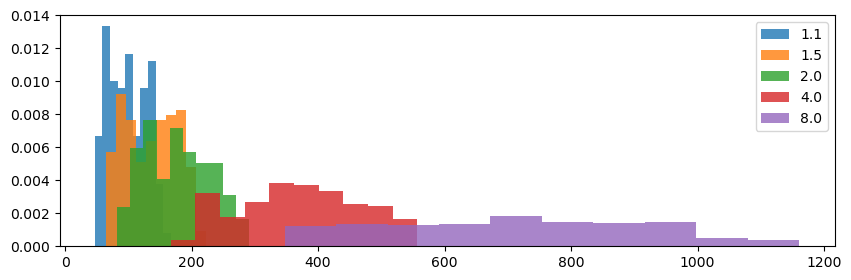

In [45]:
plt.figure(figsize=(10,3))
# no 1.1 e 1.25
incremenst = [1.1,1.5,2.0,4.0,8.0]
c = 0
for i in res:
    plt.hist(i,density=True,alpha=0.8,label=str(incremenst[c]))
    c =  c + 1
plt.legend()

# old sbm

In [ ]:
n_graphs = 200
orig_size_max = 40
orig_size_min = 20
min_n_com = 2
max_n_com = 5

delta = 10
m = 30
for increm in [1.1,1.25,1.5,2.0,4.0]:#,8.0]:
    
    new_m = int(m*increm)
    nodes_min = new_m - delta
    nodes_max = new_m + delta
    print("MIN",nodes_min,"MAX",nodes_max,"\tnb comm:",min_n_com,"-",max_n_com)
    
    adjs = build_sbm(n_graphs,nodes_max,nodes_min,min_n_com,max_n_com)
    #np.save("dataset/sbm/sbm_large_"+str(increm)+".npy",adjs)
    
res = []
for increm in [1.1,1.5,2.0,4.0,8.0]:
    A = np.load("dataset/sbm/sbm_large_"+str(increm)+".npy",allow_pickle=True)
    #graphs = [nx.from_numpy_array(x) for x in A]
    dist = [len(x) for x in A]
    res.append(dist)  
    
plt.figure(figsize=(10,3))
# no 1.1 e 1.25
incremenst = [1.1,1.5,2.0,4.0,8.0]
c = 0
for i in res:
    plt.hist(i,density=True,alpha=0.8,label=str(incremenst[c]))
    c =  c + 1
plt.legend()